# 1. Import and Install Dependencies

In [1]:
! pip install tensorflow opencv-python mediapipe matplotlib

In [2]:
import tensorflow as tf
tf.config.list_physical_devices('GPU')

[]

In [ ]:
import cv2
import numpy as np
import os
from matplotlib import pyplot as plt
import time
import mediapipe as mp

# 2. Keypoints using MP Holistic

In [ ]:
mp_holistic = mp.solutions.holistic # Holistic model
mp_drawing = mp.solutions.drawing_utils # Drawing utilities

In [ ]:
def mediapipe_detection(image, model):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) # COLOR CONVERSION BGR 2 RGB
    image.flags.writeable = False                  # Image is no longer writeable
    results = model.process(image)                 # Make prediction
    image.flags.writeable = True                   # Image is now writeable 
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR) # COLOR COVERSION RGB 2 BGR
    return image, results

In [ ]:
def draw_landmarks(image, results):
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw left hand connections
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw right hand connections

In [ ]:
def draw_styled_landmarks(image, results):
    # Draw face connections
    # Draw left hand connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(121,22,76), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(121,44,250), thickness=2, circle_radius=2)
                             ) 
    # Draw right hand connections  
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2)
                             ) 

In [ ]:
cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        
        # Draw landmarks
        draw_styled_landmarks(image, results)

        # Show to screen
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

I0000 00:00:1724795939.356711  771970 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83), renderer: Apple M1
INFO: Created TensorFlow Lite XNNPACK delegate for CPU.
W0000 00:00:1724795939.513973  772427 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1724795939.523473  772427 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1724795939.525036  772434 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1724795939.525159  772428 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1724795939.525961  772427 inference_feedback_manager.cc:114] Feedback manager requires a model

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

In [ ]:
results

mediapipe.python.solution_base.SolutionOutputs

In [ ]:
draw_landmarks(frame, results)

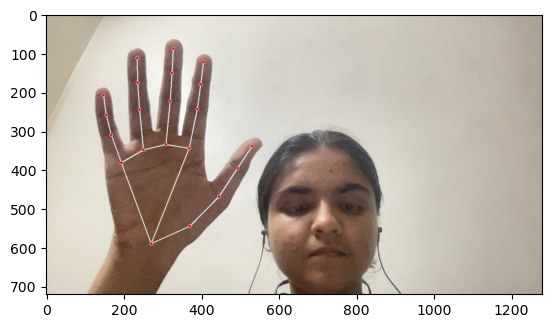

In [ ]:
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

# 3. Extract Keypoint Values

In [ ]:

lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)

In [ ]:
def extract_keypoints(results):
    lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
    rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)
    return np.concatenate([lh, rh])

In [ ]:
result_test = extract_keypoints(results)

In [ ]:
result_test

array([ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  

In [ ]:
468*3+33*4+21*3+21*3

1662

In [ ]:
np.save('0', result_test)

In [ ]:
np.load('0.npy')

array([ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  

# 4. Setup Folders for Collection

In [ ]:
# Path for exported data, numpy arrays
DATA_PATH = os.path.join('/Users/shriya/Downloads/keypoints_sih/islrtc_shriya') 

# Actions that we try to detect
actions = np.array(['ajivit', 'anta_pranali', 'antagrahan','aterna','understory'])

# Thirty videos worth of data
no_sequences = 30

# Videos are going to be 30 frames in length
sequence_length = 30

In [ ]:
# hello
## 0
## 1
## 2
## ...
## 29
# thanks

# I love you

In [ ]:
for action in actions: 
    for sequence in range(no_sequences):
        try: 
            os.makedirs(os.path.join(DATA_PATH, action, str(sequence)))
        except:
            pass

# 5. Collect Keypoint Values for Training and Testing

In [ ]:
import os
import cv2

# Paths
DATASET_PATH = '/Users/shriya/Desktop/video_train'  # Replace with the path to your dataset containing folders with videos
OUTPUT_PATH = '/Users/shriya/Downloads/ex_data_frames/islrtc_shriya'
# Loop through each folder (each containing one video)
for action in os.listdir(DATASET_PATH):
    action_path = os.path.join(DATASET_PATH, action)
    
    # Check if the current item is a directory, and skip if it's not
    if not os.path.isdir(action_path):
        continue
    
    video_files = [f for f in os.listdir(action_path) if f.lower().endswith(('.mp4', '.avi', '.mov'))]

    for video_file in video_files:
        video_path = os.path.join(action_path, video_file)
        cap = cv2.VideoCapture(video_path)
        
        frame_count = 0
        while cap.isOpened():
            ret, frame = cap.read()
            if not ret:
                break

            # Create a directory for frames if it doesn't exist
            frames_path = os.path.join(OUTPUT_PATH, action)
            os.makedirs(frames_path, exist_ok=True)

            # Save the frame
            frame_filename = os.path.join(frames_path, f'frame_{frame_count:04d}.jpg')
            cv2.imwrite(frame_filename, frame)
            frame_count += 1

        cap.release()

print("Frames extraction complete.")


Frames extraction complete.


In [ ]:
import os
import cv2

# Paths
FRAMES_PATH = '/Users/shriya/Downloads/ex_data_frames/islrtc_shriya'  # Path where the frames are saved
PROCESSED_FRAMES_PATH = '/Users/shriya/Downloads/processed_frames'  # Path where processed frames will be saved

# Loop through each action (class/folder)
for action in os.listdir(FRAMES_PATH):
    action_frames_path = os.path.join(FRAMES_PATH, action)
    
    if not os.path.isdir(action_frames_path):
        continue
    
    # Get list of all frames
    frames = sorted([f for f in os.listdir(action_frames_path) if f.lower().endswith(('.jpg', '.jpeg', '.png'))])
    
    # Create directory for processed frames
    processed_action_path = os.path.join(PROCESSED_FRAMES_PATH, action)
    os.makedirs(processed_action_path, exist_ok=True)
    
    for frame in frames:
        frame_path = os.path.join(action_frames_path, frame)
        
        # Read the image
        img = cv2.imread(frame_path)
        if img is None:
            print(f"Warning: {frame_path} could not be read.")
            continue
        
        # Process the image (example: resize or extract keypoints)
        # For example, resize the image to 224x224
        processed_img = cv2.resize(img, (224, 224))
        
        # Save the processed image
        processed_frame_path = os.path.join(processed_action_path, frame)
        cv2.imwrite(processed_frame_path, processed_img)

print("Processing complete.")


Processing complete.


In [ ]:
import os
import numpy as np
import cv2

# Paths
PROCESSED_FRAMES_PATH = '/Users/shriya/Downloads/processed_frames'
actions = ['ajivit', 'anta_pranali', 'antagrahan', 'aterna', 'understory']
sequence_length = 30
img_height, img_width = 224, 224  # Resize images to 224x224

def load_images_from_folder(folder, sequence_length):
    images = []
    for filename in sorted(os.listdir(folder)):
        if filename.lower().endswith(('.jpg', '.jpeg', '.png')):
            img_path = os.path.join(folder, filename)
            img = cv2.imread(img_path)
            img = cv2.resize(img, (img_width, img_height))  # Resize images
            images.append(img)
    return images

def create_sequences_from_images(images, sequence_length):
    sequences = []
    for i in range(0, len(images) - sequence_length + 1, sequence_length):
        sequence = images[i:i + sequence_length]
        sequences.append(sequence)
    return np.array(sequences)

X, y = [], []

for action in actions:
    action_path = os.path.join(PROCESSED_FRAMES_PATH, action)
    images = load_images_from_folder(action_path, sequence_length)
    sequences = create_sequences_from_images(images, sequence_length)
    X.extend(sequences)
    y.extend([actions.index(action)] * len(sequences))

X = np.array(X)
y = np.array(y)
y = tf.keras.utils.to_categorical(y, num_classes=len(actions))

# Print shapes to verify
print(f'X shape: {X.shape}')
print(f'y shape: {y.shape}')


X shape: (74, 30, 224, 224, 3)
y shape: (74, 5)


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.layers import Conv3D, MaxPooling3D, Flatten, Dense, Dropout
model = Sequential([
    Conv3D(32, (3, 3, 3), activation='relu', input_shape=(sequence_length, img_height, img_width, 3)),
    MaxPooling3D((1, 2, 2)),
    Conv3D(64, (3, 3, 3), activation='relu'),
    MaxPooling3D((1, 2, 2)),
    Conv3D(128, (3, 3, 3), activation='relu'),
    MaxPooling3D((1, 2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(len(actions), activation='softmax')  # Number of classes
])


/Users/anaconda3/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['categorical_accuracy'])

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv3d (Conv3D)                 │ (None, 28, 222, 222,   │         2,624 │
│                                 │ 32)                    │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling3d (MaxPooling3D)    │ (None, 28, 111, 111,   │             0 │
│                                 │ 32)                    │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv3d_1 (Conv3D)               │ (None, 26, 109, 109,   │        55,360 │
│                                 │ 64)                    │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling3d_1 (MaxPooling3D)  │ (None, 26, 54, 54, 64) │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv3d_2 (Conv3D)               │ (None, 24, 52, 52,     │       221,312 │
│                                 │ 128)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling3d_2 (MaxPooling3D)  │ (None, 24, 26, 26,     │             0 │
│                                 │ 128)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2076672)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │   265,814,144 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 5)              │           645 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 266,094,085 (1015.07 MB)

 Trainable params: 266,094,085 (1015.07 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
import tensorflow as tf
gpus = tf.config.list_physical_devices('GPU')
if gpus:
    print("GPUs are available:")
    for gpu in gpus:
        print(f"  - {gpu.name}")
else:
    print("No GPUs detected.")


No GPUs detected.


In [ ]:
import tensorflow as tf
tf.debugging.set_log_device_placement(True)